In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/jotech/Milestone Repo/milestone-project-5/data/clean_engineered_stock.csv', index_col='Date')

In [3]:
df.dropna(inplace=True)

In [4]:
df.head()

,Close,Daily Return,MA_50,MA_200,Volatility,RSI
Date,,,,,,
2021-04-19,4163.259766,-0.005307,3956.317007,3610.203705,0.006847,81.494024
2021-04-20,4134.939941,-0.006802,3961.279204,3615.228354,0.007125,77.486287
2021-04-21,4173.419922,0.009306,3966.435801,3620.196854,0.006867,79.061562
2021-04-22,4134.979980,-0.009211,3970.910801,3625.145154,0.007163,67.105580
2021-04-23,4180.169922,0.010929,3976.316602,3630.196304,0.007363,65.799450


In [5]:
X = df.drop('Close', axis=1).values
y = df['Close'].values

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [7]:
X_train, X_test, y_train, y_test =  train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.legacy.SGD(lr=0.001), loss='mse', metrics=['mse'])

/Users/jotech/Milestone Repo/milestone-project-5/.venv/lib/python3.9/site-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=128, batch_size=32, verbose=2)

Epoch 1/128
18/18 - 0s - loss: 0.1788 - mse: 0.1788 - 204ms/epoch - 11ms/step
Epoch 2/128
18/18 - 0s - loss: 0.1616 - mse: 0.1616 - 13ms/epoch - 738us/step
Epoch 3/128
18/18 - 0s - loss: 0.1486 - mse: 0.1486 - 15ms/epoch - 808us/step
Epoch 4/128
18/18 - 0s - loss: 0.1355 - mse: 0.1355 - 14ms/epoch - 780us/step
Epoch 5/128
18/18 - 0s - loss: 0.1255 - mse: 0.1255 - 14ms/epoch - 765us/step
Epoch 6/128
18/18 - 0s - loss: 0.1157 - mse: 0.1157 - 14ms/epoch - 789us/step
Epoch 7/128
18/18 - 0s - loss: 0.1076 - mse: 0.1076 - 14ms/epoch - 756us/step
Epoch 8/128
18/18 - 0s - loss: 0.1028 - mse: 0.1028 - 14ms/epoch - 766us/step
Epoch 9/128
18/18 - 0s - loss: 0.0947 - mse: 0.0947 - 14ms/epoch - 752us/step
Epoch 10/128
18/18 - 0s - loss: 0.0885 - mse: 0.0885 - 14ms/epoch - 771us/step
Epoch 11/128
18/18 - 0s - loss: 0.0848 - mse: 0.0848 - 13ms/epoch - 717us/step
Epoch 12/128
18/18 - 0s - loss: 0.0808 - mse: 0.0808 - 14ms/epoch - 777us/step
Epoch 13/128
18/18 - 0s - loss: 0.0771 - mse: 0.0771 - 13ms/e

In [ ]:
y_pred = model.predict(X_test.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}\nMAE: {mae:.4f}\nR2: {r2:.4f}')

5/5 [==============================] - 0s 634us/step
MSE: 0.0416
MAE: 0.1921
R2: 0.3583


In [ ]:
predicted_price = model.predict([df_scaled[-1]])
predicted_price = scaler.inverse_transform(predicted_price.reshape(-1, 1))
print('Predicted price for asset', predicted_price[0][0])

1/1 [==============================] - 0s 28ms/step
Predicted price for asset 0.25422022


5/5 [==============================] - 0s 587us/step


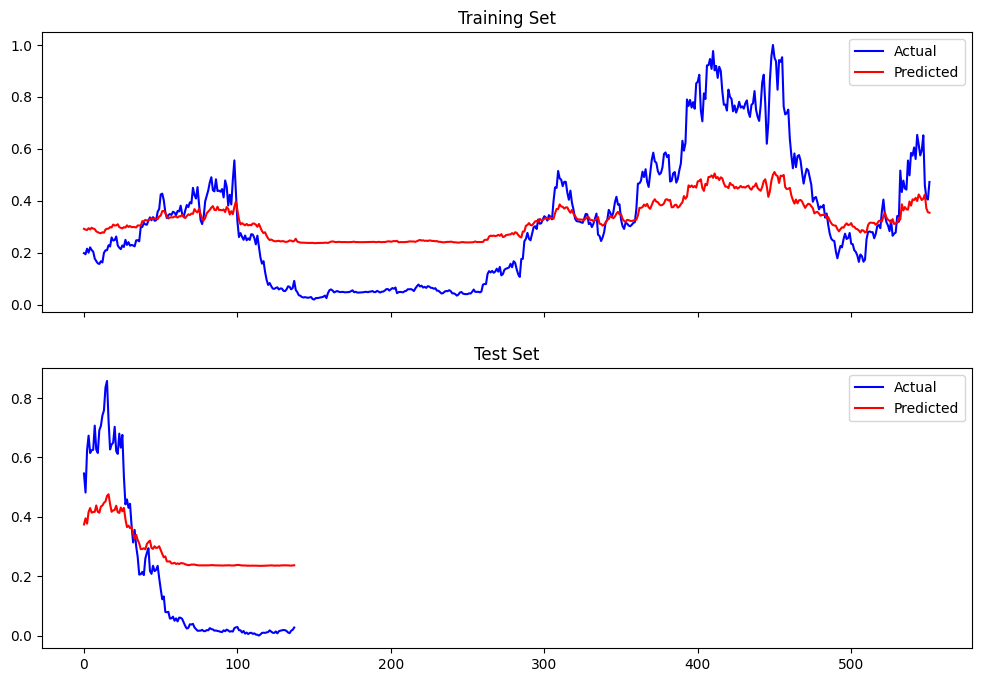

In [ ]:


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))

ax1.set_title('Training Set')
ax1.plot(y_train, color='blue', label='Actual')
ax1.plot(y_pred_train, color='red', label='Predicted')
ax1.legend()

ax2.set_title('Test Set')
ax2.plot(y_test, color='blue', label='Actual'), 
ax2.plot(y_pred_test, color='red', label='Predicted'),
ax2.legend()